In [2]:
import pandas as pd

In [3]:
songs = pd.read_csv('data/drake-songs.csv')

In [4]:
songs = songs[songs['album'] == 'thank-me-later']

In [5]:
text = ''

for index, row in songs['lyrics'].iteritems():
    text = text + str(row).lower().replace('|-|', '\n')
    
len(text)

37375

In [6]:
import numpy as np
corpus_raw = text

In [7]:
import re
words = re.findall(r"\b[A-z']+\b", corpus_raw)

In [8]:
len(words)

7482

In [41]:
int2word = dict()
word2int = dict()

uniq_words = set(words)
vocab_len = len(uniq_words)

for i, word in enumerate(uniq_words):
    int2word[i] = word
    word2int[word] = i

In [12]:
sentences = []

for sentence in corpus_raw.split('\n'):
    sentences.append(re.findall(r"\b[A-z']+\b", sentence))

In [13]:
len(sentences)

947

In [14]:
data =[]
window = 2

for sentence in sentences:
    for i, center_word in enumerate(sentence):
        for word in sentence[max(0, i - window) : min(i + window, len(sentence))]:
            if center_word != word:
                data.append([center_word, word])

In [15]:
len(data)

18251

In [30]:
def get_oh_vector(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = []
y_train = []

for data_word in data:
    x_train.append(get_oh_vector(word2int[data_word[0]], vocab_len))
    y_train.append(get_oh_vector(word2int[data_word[1]], vocab_len))

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [31]:
from unidecode import unidecode
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [40]:
encoding_size

3

In [47]:
x_train.shape

(18251, 18251)

In [68]:
model = Sequential()
model.add(Dense(encoding_size, input_shape=(x_train.shape[0], ), activation='relu'))
model.add(Dense(y_train.shape[0], activation='softmax'))
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 3)                 54756     
_________________________________________________________________
dense_32 (Dense)             (None, 18251)             73004     
Total params: 127,760
Trainable params: 127,760
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
18251/18251 [==============================] - 42s 2ms/step - loss: 6.6285 - acc: 0.0461
Epoch 2/10
18251/18251 [==============================] - 44s 2ms/step - loss: 5.8917 - acc: 0.0461
Epoch 3/10
18251/18251 [==============================] - 46s 3ms/step - loss: 5.8300 - acc: 0.0461
Epoch 4/10
18251/18251 [==============================] - 44s 2ms/step - loss: 5.8020 - acc: 0.0461
Epoch 5/10
18251/18251 [==============================] - 40s 2ms/step - loss: 5.7835 - acc: 0.0461
Epoch 6/10
18251/18251 [==============================] - 42s 2ms/step - loss: 5.7697 - acc: 0.0461
Epoch 7/10
18251/18251 [==============================] - 39s 2ms/step - loss: 5.7586 - acc: 0.0461
Epoch 8/10
18251/18251 [==============================] - 45s 2ms/step - loss: 5.7496 - acc: 0.0461
Epoch 9/10
18251/18251 [==============================] - 49s 3ms/step - loss: 5.7420 - acc: 0.0461
Epoch 10/10
18251/18251 [==============================] - 49s 3ms/step - loss: 5.7352 - acc: 0.0461

In [74]:
import matplotlib.pyplot as plt

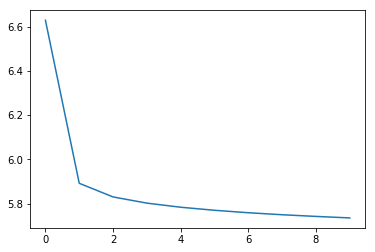

In [75]:
plt.plot(history.history['loss'])

In [72]:
from mpl_toolkits.mplot3d import Axes3D
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

In [76]:
weights = model.layers[0].get_weights()[0]

In [78]:
weights.shape

(18251, 3)

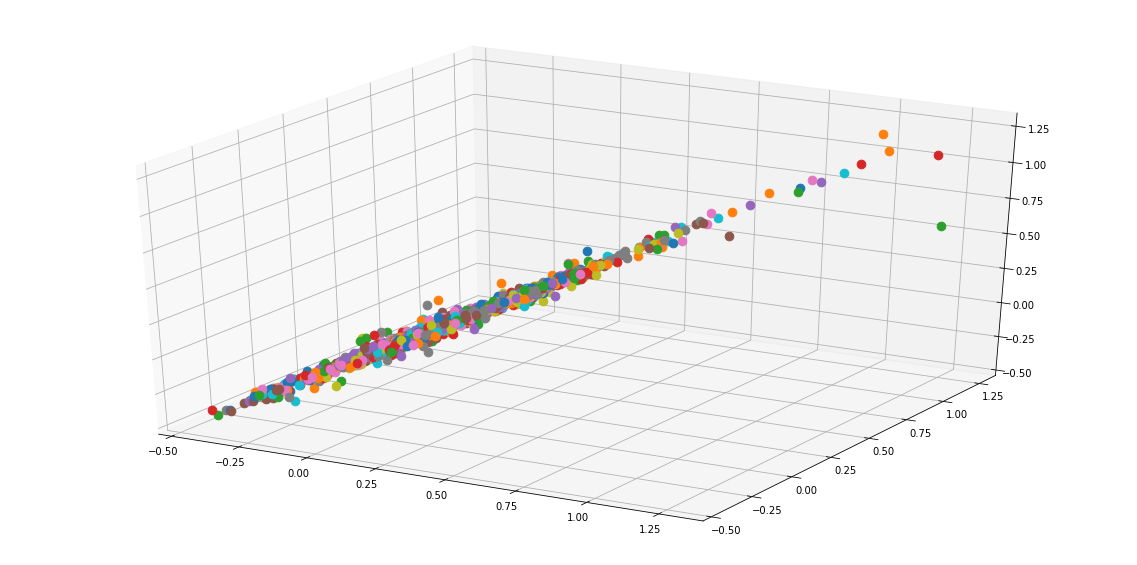

In [77]:
from mpl_toolkits.mplot3d import Axes3D
Axes3D

def plot_3d(weights):
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(0, len(weights)):
        ax.scatter(
            weights[i, 0], 
            weights[i, 1], 
            weights[i, 2],
            s=75,
        )
        
        ax.text(weights[i, 0], weights[i, 1], weights[i, 2],  '%s' % (str(i)), size=20, zorder=1, color='k')

    plt.show()